# K-Means Clustering


K-means clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into groups, or clusters, based on similarity. The goal of k-means is to find groups in the data, with the number of groups represented by the variable "k." The algorithm works iteratively to assign data points to clusters in a way that minimizes the sum of squared distances within each cluster.

Here's a step-by-step overview of the k-means clustering process:

1. Initialization: Choose k initial cluster centroids randomly from the data points or by some other method. A centroid is the center point of a cluster.

2. Assignment: Assign each data point to the cluster whose centroid is closest to it. The distance metric commonly used is the Euclidean distance.

3. Update Centroids: Recalculate the centroids of the clusters by taking the mean of all the data points assigned to each cluster.

4. Repeat: Repeat steps 2 and 3 until convergence, where convergence occurs when the centroids no longer change significantly or after a specified number of iterations.

5. Result: The algorithm converges to a final set of clusters, and each data point is associated with the cluster whose centroid it is closest to.

It's important to note that the algorithm's performance can be sensitive to the initial choice of centroids, and it may converge to a local minimum. To mitigate this, it's common to run the algorithm multiple times with different initializations and choose the solution with the lowest sum of squared distances.

<img src= "https://miro.medium.com/v2/resize:fit:1200/1*rw8IUza1dbffBhiA4i0GNQ.png" >

For this notebook we will base our example for K-means Clustering from this source: https://towardsdatascience.com/create-your-own-k-means-clustering-algorithm-in-python-d7d4c9077670


To assess the performance of our algorithm, we will initially create a dataset of clusters in a two-dimensional space. The make_blobs function from the sklearn.datasets library generates groupings using two-dimensional normal distributions and assigns a label indicating the group to which each point belongs.

In [3]:
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from typing import List, Tuple
from scipy.spatial.distance import euclidean
import numpy as np
from sklearn.cluster import KMeans

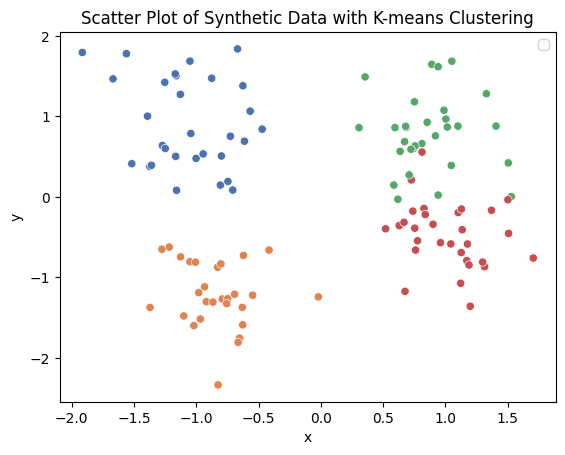

In [7]:
# Specify the number of centers, random state, and number of samples
centers = 4
random_state = 30
num_samples = 120

# Generate synthetic data using make_blobs with specified parameters
X_train, true_labels = make_blobs(n_samples=num_samples, centers=centers, random_state=random_state)

# Standardize the data
X_train = StandardScaler().fit_transform(X_train)

# Plot the scatter plot with predicted labels
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot of Synthetic Data with K-means Clustering")
plt.legend()
plt.show()

During the execution of this algorithm, it will be essential to calculate distances between a particular point and a set of points in the dataset on numerous occasions. To simplify this process, let's create a specialized function for computing Euclidean distances.is likely to misclassify it as a member of the green group.

In [2]:
from sklearn.metrics.pairwise import euclidean_distances

def calculate_euclidean_distance(point, data):
    """
    Compute the Euclidean distance between a point and a dataset.

    Parameters:
    - point: Array with dimensions (m,)
    - data: Array with dimensions (n, m)

    Returns:
    - distances: Array of size (n,) containing the Euclidean distances between the point and each data point.
    """
    distances = euclidean_distances(point.reshape(1, -1), data)
    return distances.flatten()

# Example usage:
point = np.array([1, 2])
data = np.array([[2, 3], [4, 5], [6, 7]])

distances = calculate_euclidean_distance(point, data)
print("Euclidean Distances:", distances)


[1.41421356 4.24264069 7.07106781]


## Implementation

### ```class KMeans```

To begin with, the k-means clustering algorithm is configured with a specified value for k and a maximum iteration limit to ascertain the optimal centroid positions. It is imperative to impose a maximum iteration constraint during the centroid optimization process to mitigate the risk of encountering an infinite loop.

### ```def __init__( ):```

The ```__init__``` method serves as the constructor for the KMeans class. Upon creating an instance of the KMeans class, this method is automatically invoked. It initializes the instance with the specified parameters or defaults to predetermined values if none are provided.

### ```def fit( ):```

The ```fit``` method within the KMeans class implements the training process for the KMeans clustering algorithm.

1. Centroid Initialization:
   * The method commences by initializing centroids using the "k-means++" method. It randomly selects one data point from the training data (```X_train```) as the first centroid.

2. Additional Centroid Selection:
   * Subsequently, it iteratively selects the remaining centroids by calculating distances from each data point to the current centroids, normalizing these distances, and selecting the next centroid based on these normalized distances.

3. Iterative Centroid Adjustment:
   * After initializing centroids, the method enters a loop to iteratively adjust the centroids until convergence or until the maximum number of iterations (```max_iter```) is reached.
   * Within each iteration, it assigns each data point to the nearest centroid, calculates new centroids as the mean of the data points assigned to them, and checks for convergence by comparing with the previous centroids.

4. Convergence Criteria:
   * Convergence is determined by checking whether any centroid has changed in position from the previous iteration. If there are no changes or if the maximum number of iterations is reached, the loop exits.

This process constitutes the training phase of the KMeans algorithm, wherein centroids are iteratively adjusted to minimize the distance between data points and their assigned centroids. The final positions of the centroids represent the centers of the clusters in the data.

### ```def evaluate( ):```

The ```evaluate``` method in the ```KMeans``` class is formulated to assess the KMeans model's performance on a given set of data points (```X```).

1. Input Parameters:
   * ```X```: A list of NumPy arrays representing data points. Each element in the list is a data point that the KMeans model will be evaluated on.

2. Initialization:
   * ```centroids```: An empty list that stores the centroids corresponding to each data point after evaluation.
   * ```centroid_idxs```: An empty list that stores the indices of centroids for each data point.

3. Evaluation Loop:
   * The method iterates over each data point (```x```) in the input data (```X```).
   * For each data point, it calculates the distances from that point to the centroids of the KMeans model using the Euclidean distance measure.

4. Centroid Assignment:
   * Subsequently, it determines the index of the nearest centroid for the current data point (```centroid_idx```), which is the centroid with the minimum Euclidean distance.
   * The centroid and its index are appended to the respective lists (```centroids``` and ```centroid_idxs```).

5. Return Statement:
   * The method returns a tuple containing two lists:
     * ```centroids```: A list of NumPy arrays representing the centroids corresponding to each data point.
     * ```centroid_idxs```: A list of integers representing the indices of centroids for each data point.

In [8]:
import numpy as np
from typing import List, Tuple
from sklearn.metrics.pairwise import euclidean_distances

class KMeans:
    """
    KMeans clustering algorithm implementation.

    Parameters:
    - n_clusters (int, optional): Number of clusters. Default is 8.
    - max_iter (int, optional): Maximum number of iterations. Default is 300.
    """

    def __init__(self, n_clusters=8, max_iter=300):
        """
        Initialize KMeans instance.

        Parameters:
        - n_clusters (int, optional): Number of clusters. Default is 8.
        - max_iter (int, optional): Maximum number of iterations. Default is 300.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit(self, X_train: List[np.ndarray]):
        """
        Fit the KMeans model to the training data.

        Parameters:
        - X_train (List[np.ndarray]): Training data, where each element is a data point represented as a NumPy array.
        """

        # Initialize the centroids, using the "k-means++" method
        self.centroids = np.array([X_train[np.random.choice(len(X_train))]])

        for _ in range(1, self.n_clusters):
            # Calculate distances from points to the centroids
            dists = euclidean_distances(X_train, self.centroids).min(axis=1)
            # Choose the next centroid based on squared distance
            probs = dists**2 / np.sum(dists**2)
            new_centroid_idx = np.random.choice(len(X_train), p=probs)
            self.centroids = np.vstack([self.centroids, X_train[new_centroid_idx]])

        # Iterate, adjusting centroids until converged or until passed max_iter
        for _ in range(self.max_iter):
            # Assign each point to the closest centroid
            labels = np.argmin(euclidean_distances(X_train, self.centroids), axis=1)

            # Update centroids as the mean of the assigned points
            new_centroids = np.array([np.mean(X_train[labels == i], axis=0) for i in range(self.n_clusters)])

            # Check for convergence
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

    def evaluate(self, X: List[np.ndarray]) -> Tuple[List[np.ndarray], List[int]]:
        """
        Evaluate the KMeans model on the given data.

        Parameters:
        - X (List[np.ndarray]): Data to be evaluated, where each element is a data point represented as a NumPy array.

        Returns:
        - Tuple[List[np.ndarray], List[int]]: A tuple containing two lists - the centroids and the indices of centroids for each data point.
        """
        # Calculate distances from data points to centroids
        distances = euclidean_distances(X, self.centroids)

        # Find the index of the nearest centroid for each data point
        centroid_idxs = np.argmin(distances, axis=1)

        # Get the actual centroids corresponding to each data point
        centroids = self.centroids[centroid_idxs]

        return centroids.tolist(), centroid_idxs.tolist()

We are now ready to deploy the model. We will proceed by training and testing it on the original dataset and examining the outcomes. To visualize the results, we will adhere to the initial data plotting method, utilizing distinct colors to differentiate true labels. Moreover, different marker styles will be employed to depict predicted labels, offering insights into the model's performance.

Feel free to execute this code block multiple times to assess the model's performance variability.

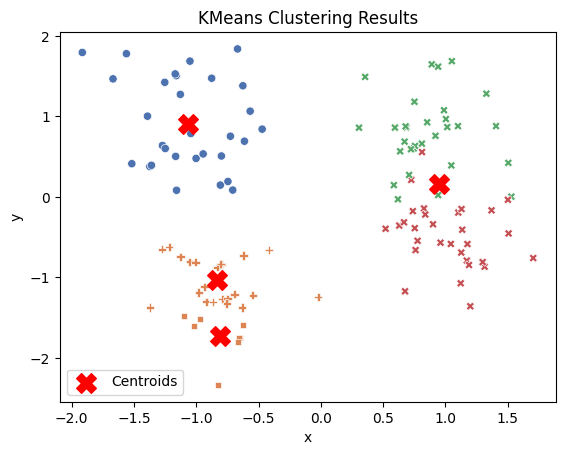

In [9]:
# Fit the KMeans model
kmeans = KMeans(n_clusters=centers)
kmeans.fit(X_train)

# Evaluate the KMeans model
class_centers, classification = kmeans.evaluate(X_train)

# Plot the scatter plot with original data points
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )

# Plot the centroids with a distinctive marker
plt.scatter(kmeans.centroids[:, 0],
            kmeans.centroids[:, 1],
            marker='X',  # Use a distinctive marker for centroids
            s=200,  # Marker size
            color='red',  # Color for centroids
            label='Centroids'
            )

plt.xlabel("x")
plt.ylabel("y")
plt.title("KMeans Clustering Results")
plt.legend()
plt.show()

## Reassessing Centroid Initialization

As we can see, we are not egetting the same results every time we run it.

From the unsuccessful instances mentioned earlier, we can identify two primary issues:
1. If a centroid is initialized at a considerable distance from any clusters, it is less likely to experience substantial displacement.
2. When centroids are initialized in close proximity, they are less likely to demonstrate significant divergence from each other.

Let's gauge the performance of this model against Python's built-in KMeans function.

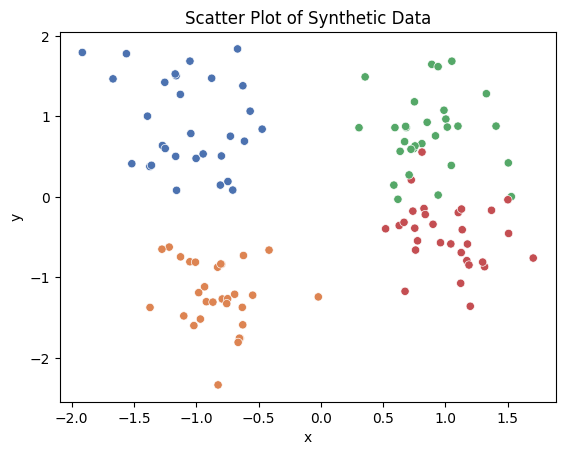

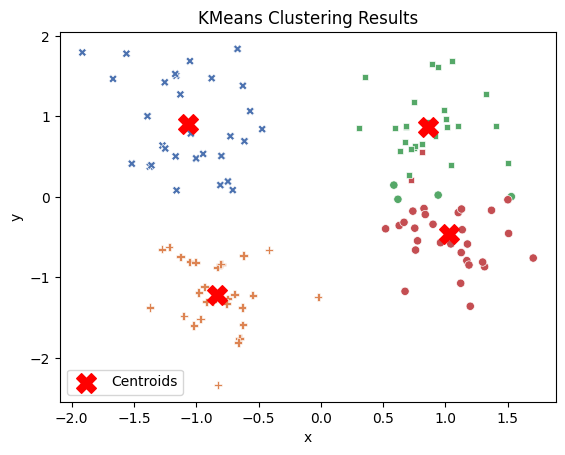

In [10]:
# Specify the number of centers, random state, and number of samples
centers = 4
random_state = 30
num_samples = 120

# Generate synthetic data using make_blobs with specified parameters
X_train, true_labels = make_blobs(n_samples=num_samples, centers=centers, random_state=random_state)

# Standardize the data
X_train = StandardScaler().fit_transform(X_train)

# Plot the scatter plot for the synthetic data
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot of Synthetic Data")
plt.show()

# Use the modified KMeans class
kmeans = KMeans(n_clusters=centers, max_iter=300)
kmeans.fit(X_train)

# Get the labels and cluster centers
classification = kmeans.evaluate(X_train)[1]
class_centers = kmeans.centroids

# Plot the scatter plot with original data points
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )

# Plot the centroids with a distinctive marker
plt.scatter(class_centers[:, 0],
            class_centers[:, 1],
            marker='X',  # Use a distinctive marker for centroids
            s=200,  # Marker size
            color='red',  # Color for centroids
            label='Centroids'
            )

plt.xlabel("x")
plt.ylabel("y")
plt.title("KMeans Clustering Results")
plt.legend()
plt.show()


# Conclusion
In the provided code, we've implemented a custom KMeans clustering algorithm using a class-based structure. This custom KMeans class includes methods for fitting the model to data, evaluating the model on new data, and extracting cluster centroids. The code has been demonstrated on synthetic data. Additionally, the script visualizes the clustering results by plotting the original data points, color-coded according to true labels, and styled based on their assigned clusters. Centroids are distinctly marked, offering a clear depiction of the clustering outcome. This thorough implementation and visualization contribute to a deeper comprehension of the KMeans algorithm and its effectiveness on the provided dataset.